# Curso extensão de Machine learning - dia 1
Eloisa Medeiros - Ciencia de dados
Profº Ricardo Roberto


In [3]:
!pip install numpy
!pip install sklearning

  Preparing metadata (setup.py) ... done
  Created wheel for sklearning: filename=sklearning-0.0.1-py3-none-any.whl size=3143 sha256=4c05bcb9fd005c5fc1c45ddb997ac23606cee7417885b4566692b276b461e2eb
  Stored in directory: /root/.cache/pip/wheels/d0/61/9d/553a44d896f4997e33ea3888b182f149badf7a97cf3ccb1c76
Successfully built sklearning


In [4]:
!pip install requests

In [5]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd

In [6]:
# Carregando o dataset Íris
dados = load_iris() # carregando o dataset Íris para o dataframe dados
caracteristicas = dados.data  # Características (comprimento/largura das pétalas e sépalas)
classes = dados.target  # Classes das flores

In [7]:
# Dividir os dados em conjunto de treino e teste
caracteristicas_treino, caracteristicas_teste, classes_treino, classes_teste = train_test_split(caracteristicas, classes, test_size=0.75, random_state=42)

In [8]:
dados.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
# Criar e treinar o modelo Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)
modelo.fit(caracteristicas_treino, classes_treino)

RandomForestClassifier(random_state=42)

In [10]:
# Fazer previsões
previsoes = modelo.predict(caracteristicas_teste)

Analise de features que estão correlacionados - recursos adicionados

In [17]:
import matplotlib.pyplot as plt

In [24]:
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(dados, size=10):
    corr = dados.corr()
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

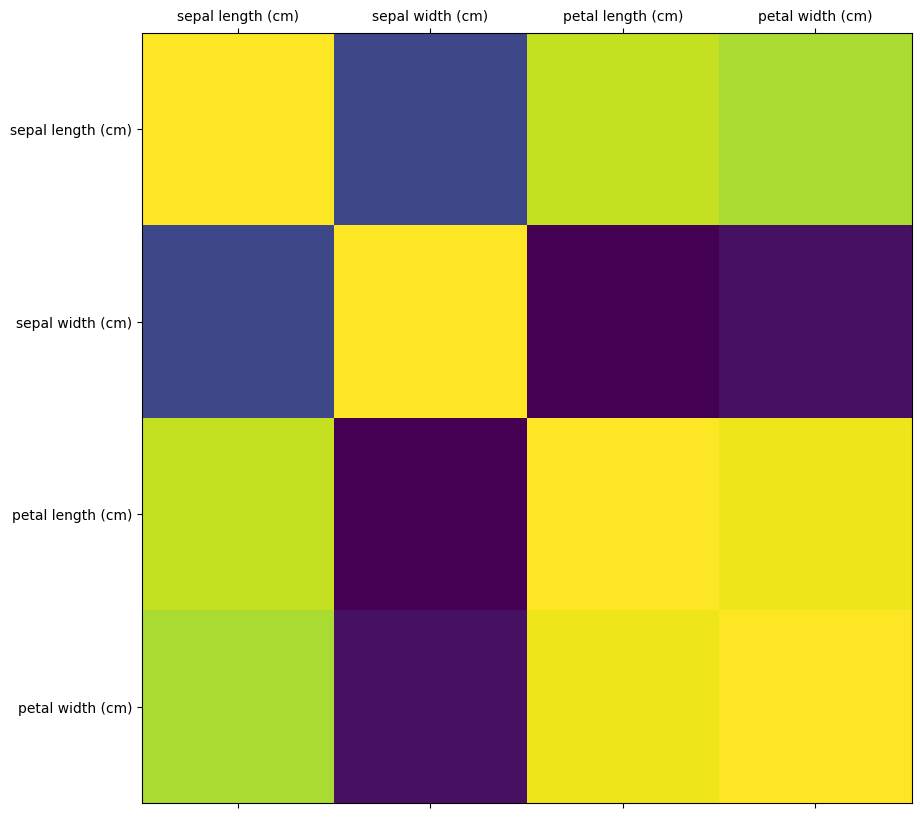

In [26]:
# Criando o gráfico -
# Convertendo dados para dataframe pandas - cores proximas a amarelo indica correlação forte
dados_df = pd.DataFrame(dados.data, columns=dados.feature_names)
plot_corr(dados_df)

In [ ]:
# Avaliar o modelo
acuracia = accuracy_score(classes_teste, previsoes)
print(f'Acurácia: {acuracia:.2f}')
print('Relatório de Classificação:')
print(classification_report(classes_teste, previsoes, target_names=dados.target_names))

Acurácia: 0.95
Relatório de Classificação:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.92      0.92      0.92        36
   virginica       0.91      0.91      0.91        35

    accuracy                           0.95       113
   macro avg       0.94      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



In [ ]:
# A acurácia deu 100%, o que significa que houve overfitting (os dados foram decorados, e não aprendidos). Uma possível solução seria
# aumentar a quantidade de dados para treino.
# Aumentar quantidade de features

In [ ]:
import joblib

In [ ]:
# Modelo salvo em um arquivo pkl
joblib.dump(modelo, 'modelo_iris.pkl')
print("Modelo salvo com sucesso em 'modelo_iris.pkl'")

Modelo salvo com sucesso em 'modelo_iris.pkl'
